In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# for concept - it creates array 3*1 of random 100 values
np.random.rand(100,1)  #here 1 is colums we want

array([[-0.13315655],
       [ 1.32631408],
       [-1.09120425],
       [ 0.7054822 ],
       [ 0.80984189],
       [-0.57155173],
       [-0.52488536],
       [ 0.2627188 ],
       [-0.17517805],
       [-0.32790064],
       [ 0.46029977],
       [ 1.67101096],
       [-1.63288636],
       [-0.79710741],
       [ 0.11833009],
       [ 1.12227297],
       [-1.14338696],
       [ 0.44202035],
       [-0.61477272],
       [ 0.13051644],
       [-0.71827277],
       [-0.81209507],
       [ 0.24650101],
       [ 0.63712723],
       [ 0.14363843],
       [ 0.15233933],
       [ 0.87400291],
       [ 0.24479584],
       [ 0.9298891 ],
       [ 0.78724972],
       [-0.87720318],
       [-0.18828535],
       [-0.01467961],
       [ 0.71953563],
       [ 0.8527031 ],
       [-0.08186155],
       [-1.51467093],
       [-1.71527925],
       [-0.4654513 ],
       [ 1.77397464],
       [ 0.67777951],
       [-0.92525686],
       [-0.21300998],
       [-2.06307055],
       [-0.32107351],
       [-3

In [7]:
# creating random data for Polynomial regression
X = 6 * (np.random.rand(100,1)) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)  #here radndn generates some -ve values also

#Quadratic equation is used = 0/5X^2  +  1.5X  +  2  +  outliers

Text(0, 0.5, 'Y dataset')

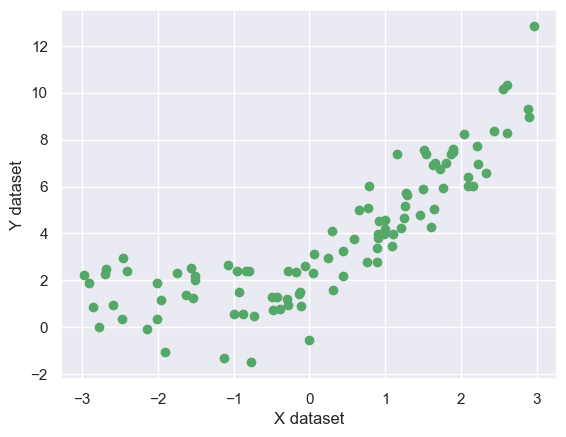

In [10]:
# plotting
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')


### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Simple Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [15]:
regression.fit(X_train,y_train)

LinearRegression()

### R2 Score

In [16]:
from sklearn.metrics import r2_score
score  = r2_score(y_test,regression.predict(X_test))
score

# results low accuracy as data points are not uniformly distributed

0.6957019624293674

Text(0, 0.5, 'y train')

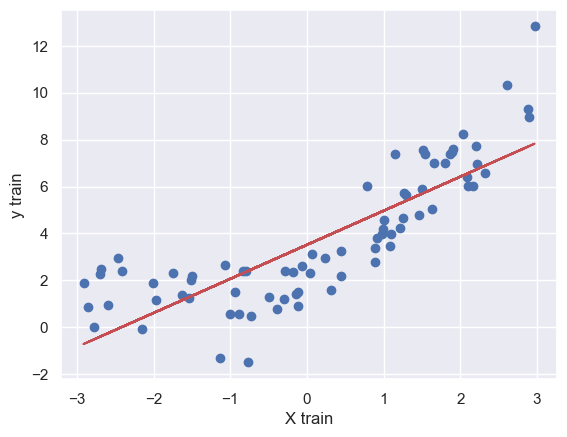

In [22]:
# visualize
plt.plot(X_train,regression.predict(X_train),color = 'r')
plt.scatter(X_train,y_train)
plt.xlabel('X train')
plt.ylabel('y train')


### apply polynomial regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [25]:
X_train_poly
# values are  1  x   x^2

array([[ 1.00000000e+00, -3.85254843e-01,  1.48421294e-01],
       [ 1.00000000e+00, -1.74876353e+00,  3.05817388e+00],
       [ 1.00000000e+00, -2.14721932e+00,  4.61055081e+00],
       [ 1.00000000e+00,  4.46730415e-01,  1.99568064e-01],
       [ 1.00000000e+00,  8.88739480e-01,  7.89857864e-01],
       [ 1.00000000e+00,  9.10466027e-01,  8.28948387e-01],
       [ 1.00000000e+00, -1.80960175e-01,  3.27465848e-02],
       [ 1.00000000e+00,  1.00119816e+00,  1.00239775e+00],
       [ 1.00000000e+00, -9.34285028e-01,  8.72888513e-01],
       [ 1.00000000e+00,  6.32730209e-02,  4.00347517e-03],
       [ 1.00000000e+00, -2.45831391e+00,  6.04330728e+00],
       [ 1.00000000e+00,  1.80635602e+00,  3.26292208e+00],
       [ 1.00000000e+00,  1.66027007e+00,  2.75649670e+00],
       [ 1.00000000e+00,  1.53986324e+00,  2.37117881e+00],
       [ 1.00000000e+00,  1.09588377e+00,  1.20096123e+00],
       [ 1.00000000e+00, -7.30415129e-01,  5.33506261e-01],
       [ 1.00000000e+00,  2.21822865e+00

In [26]:
from sklearn.metrics import r2_score
regression_1 = LinearRegression()
regression_1.fit(X_train_poly,y_train)
y_pred = regression_1.predict(X_test_poly)
score_1 = r2_score(y_test,y_pred)
print(score_1)

0.8387994830817924


In [27]:
print(regression_1.coef_)

[[0.         1.48812712 0.46869678]]


In [28]:
print(regression_1.intercept_)

[2.25547569]


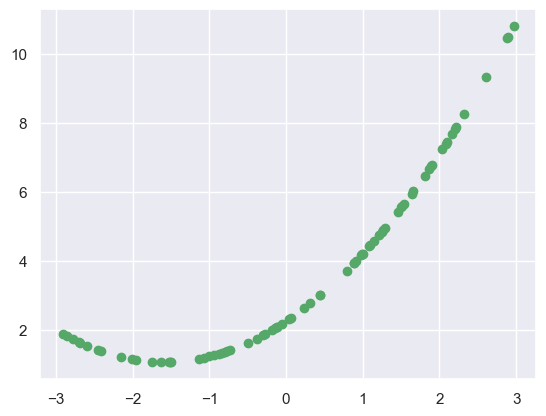

In [30]:
# plot this new 
plt.scatter(X_train,regression_1.predict(X_train_poly),color ='g')


In [32]:
#predicting on new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

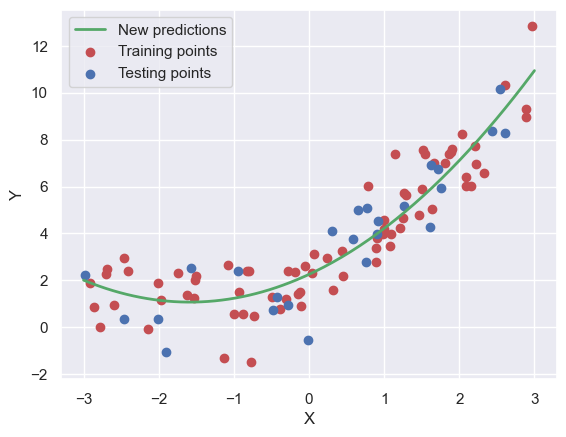

In [44]:
%matplotlib inline
y_new = regression_1.predict(X_new_poly)
plt.plot(X_new,y_new,'g',linewidth =2,label='New predictions')
plt.scatter(X_train,y_train,color = 'r',label='Training points')
plt.scatter(X_test,y_test,color = 'b',label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



### --------------------------------------End--------------------------

### Pipeline in Polynomial

In [46]:
from sklearn.pipeline import Pipeline

In [67]:
#creating function for polynomial regression
def poly(degree):
    X_new_var = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree = degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("Poly_features",poly_features),  
        ("linear_regression",lin_reg)
    ]) #used as separate function or workflow in short
    
    poly_regression.fit(X_train,y_train) #1st it creates poly_features then it apply lin_reg
    y_pred_new = poly_regression.predict(X_new_var)

    #plotting prediction line
    plt.plot(X_new_var,y_pred_new,'g',label = f'prediction (degree {degree})',linewidth = 3)
    plt.scatter(X_train,y_train,color = 'b',label='Training Dataset')
    plt.scatter(X_test,y_test,color = 'r',label='Testing Dataset')
    plt.legend(loc = 'upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

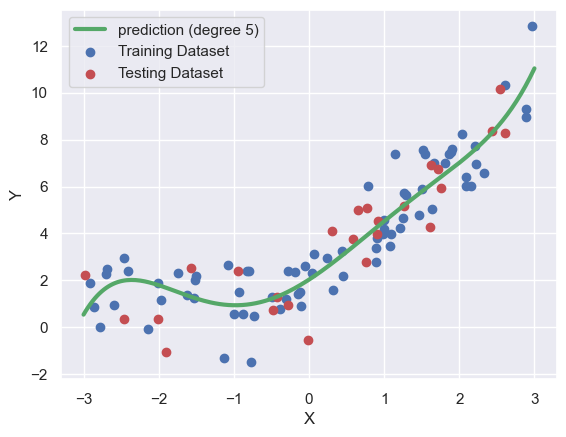

In [68]:
poly(5)